In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
data.shape

(731, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
k = 0
for i in range(data.shape[0]):
        if data[data.columns[-3]].iloc[i] + data[data.columns[-2]].iloc[i] == data[data.columns[-1]].iloc[i]:
                k += 1
if k != 0:
    print('Два предпоследних образуют последний столбец')
else:
    print('Не зависимы')

Два предпоследних образуют последний столбец


Нет отсутсвующих значений, но есть один столбец object, который необхимо перевести в числовой тип, то есть, НА МОЙ ВЗГЛЯД, необходимо сделать кодировку данного столбца с помощью OHE или TargetEncoder. Однако у нас есть другие фичи, которые представляют месяца, дни недели, года. Так что лучше чистые даты убрать.
К тому же если посмотреть на последние три столбца, то два предпоследних в сумме образуеют послений столбец, что не явялется хорошо. Поэтому следует либо один из них удалить, либо оба сразу

In [8]:
data.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


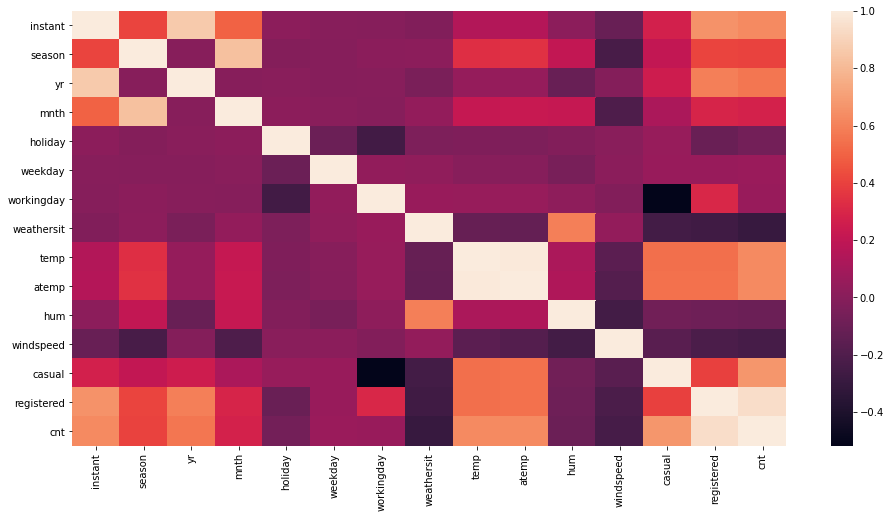

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.heatmap(data.corr(), ax = ax)

In [10]:
df = data.drop(['instant', 'registered', 'dteday'], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1600


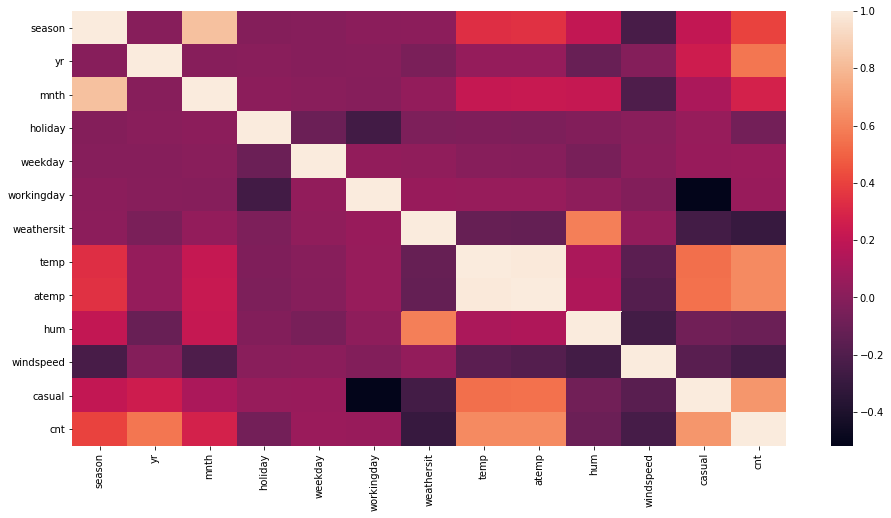

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.heatmap(df.corr(), ax = ax)

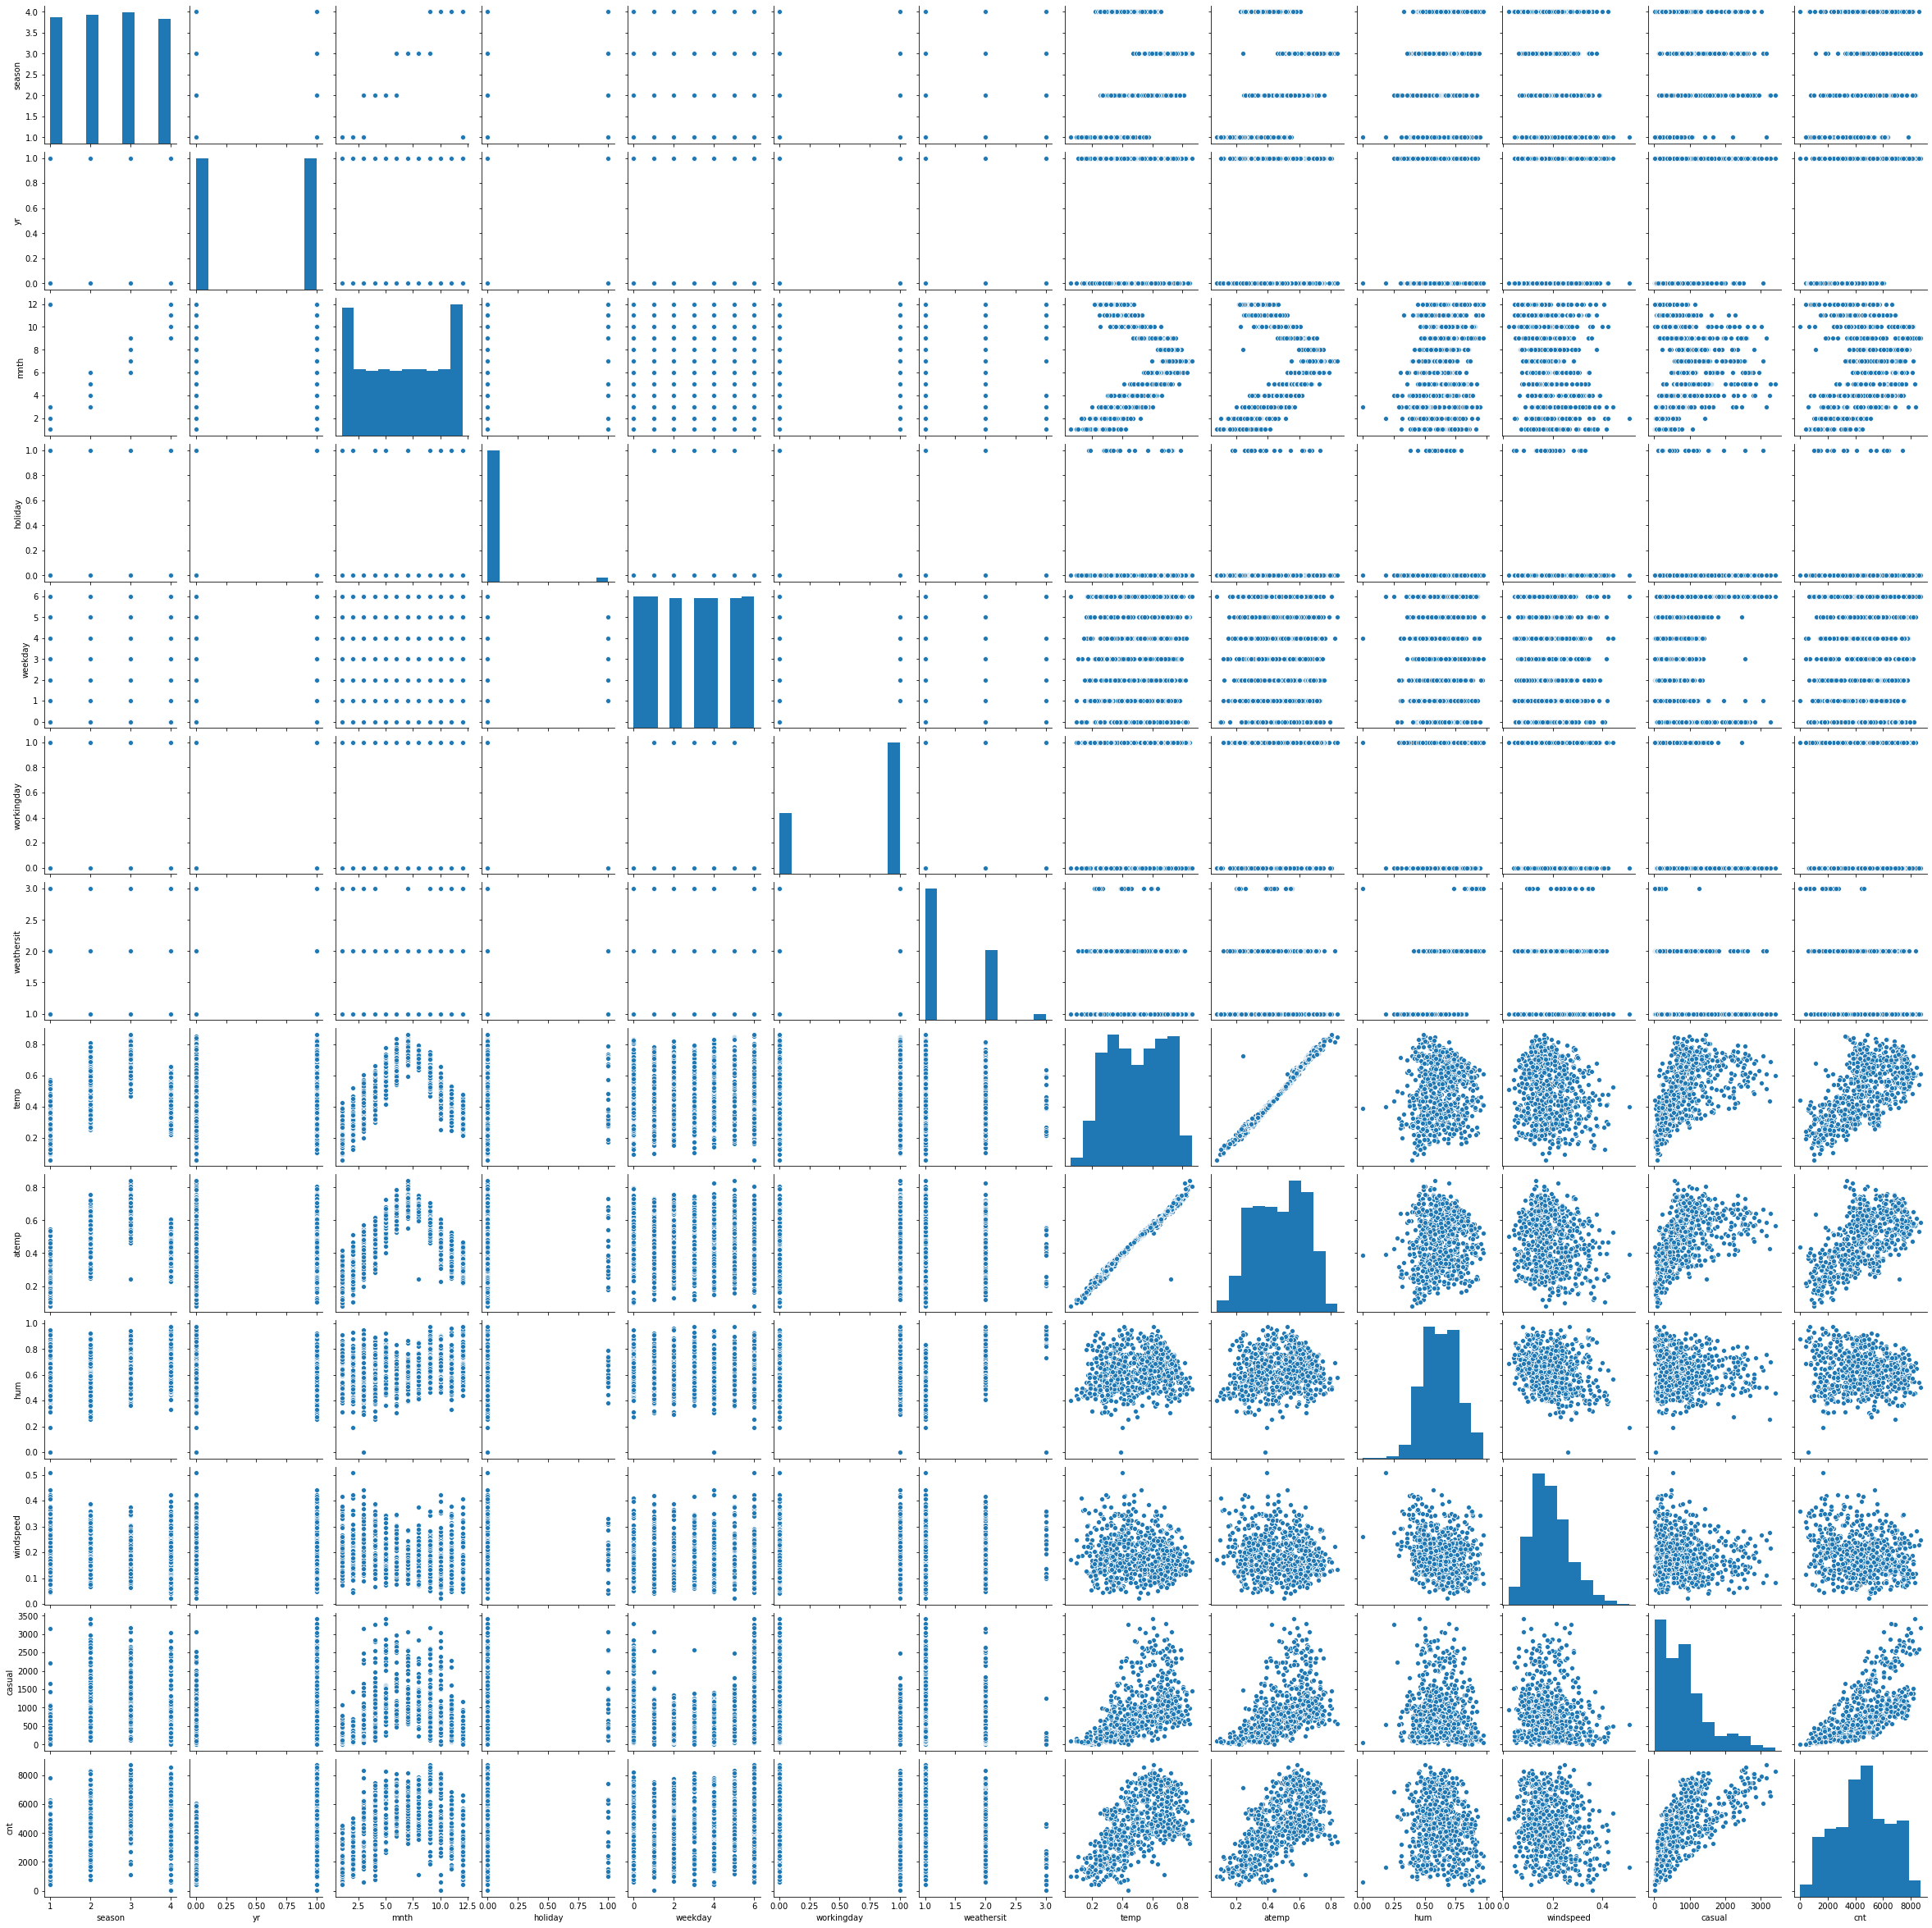

In [10]:
sns.pairplot(data = df)

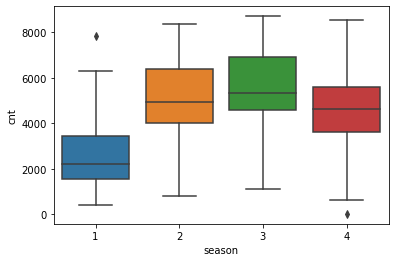

In [12]:
sns.boxplot(x = 'season', y = 'cnt', data = df)

In [13]:
X = df.drop('cnt', axis = 1)
Y = df['cnt']
X.shape, Y.shape

((731, 12), (731,))

In [14]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, Y, test_size = 0.3, random_state = 17)

In [15]:
X_train.shape, y_train.shape

((511, 12), (511,))

In [16]:
scaler = preprocessing.StandardScaler()

X_train_standart = scaler.fit_transform(X_train)
X_holdout_standart = scaler.fit_transform(X_holdout)

In [17]:
X_frame_train = pd.DataFrame(X_train_standart, columns = X.columns)
X_frame_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
0,1.350462,-0.986394,1.286439,5.750362,1.014795,-1.481131,-0.735471,-0.866354,-0.960088,-1.285433,1.602688,-0.565007
1,-1.310539,1.013794,-1.553173,-0.173902,1.014795,0.675160,1.106811,-1.451293,-1.489802,-1.258763,0.182228,-1.049305
2,-1.310539,1.013794,-0.985251,-0.173902,1.516304,-1.481131,-0.735471,-1.067428,-1.139314,-1.966995,0.474125,0.221790
3,1.350462,-0.986394,1.570400,-0.173902,-0.489732,0.675160,2.949093,-0.107765,-0.037223,2.294262,0.560844,-1.032913
4,0.463462,1.013794,0.718516,-0.173902,-0.489732,0.675160,-0.735471,1.336298,1.384792,0.910392,0.608284,0.071285
...,...,...,...,...,...,...,...,...,...,...,...,...
506,-1.310539,1.013794,-1.269212,-0.173902,1.516304,-1.481131,2.949093,-1.414733,-1.552059,0.741482,1.286945,-0.934564
507,-1.310539,1.013794,-1.553173,-0.173902,0.513286,0.675160,1.106811,-0.770388,-0.656341,1.014106,-1.459429,-0.857076
508,-0.423538,-0.986394,-0.417328,-0.173902,-0.489732,0.675160,1.106811,0.975283,0.878424,0.809636,0.237333,-0.238665
509,0.463462,-0.986394,0.434555,-0.173902,-0.489732,0.675160,-0.735471,0.861040,0.816055,-0.559420,-0.804409,-0.065808


In [18]:
X_frame_hold = pd.DataFrame(X_holdout_standart, columns = X.columns)
X_frame_hold

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
0,-0.506778,-1.037050,-0.805462,-0.167444,-1.010433,0.690297,-0.704552,0.446139,0.449362,1.003019,-0.135418,-0.199276
1,1.367022,-1.037050,1.027659,-0.167444,-1.504422,-1.448652,1.118994,-0.938611,-0.971969,1.105594,0.360353,-0.418725
2,0.430122,-1.037050,-0.194422,-0.167444,0.471535,0.690297,-0.704552,0.944648,0.837019,-1.339088,-0.135702,0.155755
3,-1.443678,0.964274,-1.110983,-0.167444,-0.022454,0.690297,-0.704552,-0.675508,-0.725246,-0.797730,2.033187,-0.675913
4,-1.443678,0.964274,-1.416503,-0.167444,0.471535,0.690297,1.118994,-0.703203,-0.639222,0.293549,-0.110360,-1.014171
...,...,...,...,...,...,...,...,...,...,...,...,...
215,-1.443678,-1.037050,-1.110983,-0.167444,0.965525,0.690297,-0.704552,0.076870,0.154835,-0.716464,0.482052,-0.044125
216,1.367022,-1.037050,1.638699,-0.167444,-1.010433,0.690297,1.118994,-0.777060,-0.670516,1.347778,-1.799585,-0.954067
217,0.430122,0.964274,0.416618,-0.167444,-0.022454,0.690297,-0.704552,0.880025,0.829112,-0.532747,-1.118999,0.365419
218,-0.506778,0.964274,-0.805462,-0.167444,-0.516443,0.690297,-0.704552,-0.440101,-0.408133,-1.333392,0.730180,-0.134979


In [19]:
def learn(X_train, X_test, Y_train, Y_test, columns, model_name = 'LinearRegression', alphas =[0.5]):
    if model_name == 'LinearRegression':
        model = LinearRegression()
        model.fit(X_train, Y_train)
        score1 = "Качество модели (R^2) на трейнах = {}".format(model.score(X_train, Y_train))
        pred = model.predict(X_test)
        score2 = "Качество модели (R^2) на тестовых = {}".format(r2_score(Y_test, pred))
        RMSE = "RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False))
        return score1, score2, RMSE
    
    elif model_name == 'Ridge':
        if len(alphas) > 1:
            return 'Передайте в гребневую регрессию один гиперпараметр'
        else:
            model = Ridge(alphas[0])
            model.fit(X_train, Y_train)
            score1 = "Качество модели (R^2) = {}".format(model.score(X_train, Y_train))
            pred = model.predict(X_test)
            score2 = "Качество модели (R^2) на тестовых = {}".format(r2_score(Y_test, pred))
            RMSE = "RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False))
            return score1, score2, RMSE
 
    elif model_name == 'Lasso':
        if len(alphas) > 1:
            return 'Передайте в Лассо регрессию один гиперпараметр'
        else:
            model = Lasso(alphas[0])
            model.fit(X_train, Y_train)
            score1 = "Качество модели (R^2) = {}".format(model.score(X_train, Y_train))
            pred = model.predict(X_test)
            score2 = "Качество модели (R^2) на тестовых = {}".format(r2_score(Y_test, pred))
            RMSE = "RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False))
            return score1, score2, RMSE                                      
    
    elif model_name == 'RidgeCV':
        model = RidgeCV(alphas)
        model.fit(X_train, Y_train)
        score1 = "Качество модели (R^2) = {}".format(model.score(X_train, Y_train))
        pred = model.predict(X_test)
        score2 = "Качество модели (R^2) на тестовых = {}".format(r2_score(Y_test, pred))
        RMSE = "RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False))
        alpha = 'Идеальное значение альфа = {}'.format(model.alpha_)
        return score1, score2, RMSE, alpha
 
    elif model_name == 'LassoCV':
        model = LassoCV(alphas = alphas)
        model.fit(X_train, Y_train)
        score1 = "Качество модели (R^2) = {}".format(model.score(X_train, Y_train))
        pred = model.predict(X_test)
        score2 = "Качество модели (R^2) на тестовых = {}".format(r2_score(Y_test, pred))
        RMSE = "RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False))
        alpha = 'Идеальное значение альфа = {}'.format(model.alpha_)
        return score1, score2, RMSE, alpha

In [20]:
learn(X_train_standart, X_holdout_standart, y_train, y_holdout, X.columns.tolist())

('Качество модели (R^2) на трейнах = 0.8964968664266917',
 'Качество модели (R^2) на тестовых = 0.8529638025492324',
 'RMSE = 743.9912938316661')

In [21]:
learn(X_train_standart, X_holdout_standart, y_train, y_holdout, X.columns.tolist(), 
      model_name = 'Ridge', alphas = [100])

('Качество модели (R^2) = 0.8782454400393986',
 'Качество модели (R^2) на тестовых = 0.8251213942036646',
 'RMSE = 811.3795605761269')

In [22]:
learn(X_train_standart, X_holdout_standart, y_train, y_holdout, X.columns.tolist(), 
      model_name = 'Lasso', alphas = [100])

('Качество модели (R^2) = 0.8766020361290434',
 'Качество модели (R^2) на тестовых = 0.8429888972241466',
 'RMSE = 768.8133288304125')

In [23]:
learn(X_train_standart, X_holdout_standart, y_train, y_holdout, X.columns.tolist(), 
      model_name = 'RidgeCV', alphas = np.linspace(0.01, 1000, 1000))

('Качество модели (R^2) = 0.8962826650369358',
 'Качество модели (R^2) на тестовых = 0.8516535183588306',
 'RMSE = 747.2989075220922',
 'Идеальное значение альфа = 6.015945945945946')

In [24]:
learn(X_train_standart, X_holdout_standart, y_train, y_holdout, X.columns.tolist(), 
      model_name = 'LassoCV', alphas = np.linspace(0.01, 1000, 1000))

('Качество модели (R^2) = 0.8964773700790962',
 'Качество модели (R^2) на тестовых = 0.8535366360236909',
 'RMSE = 742.5406339807696',
 'Идеальное значение альфа = 2.011981981981982')

In [27]:
Elast = ElasticNet(alpha = 10, l1_ratio = 0.1).fit(X_train_standart, y_train)
print("Качество модели (R^2) на трейнах = {}".format(Elast.score(X_train_standart, y_train)))
pred = Elast.predict(X_holdout_standart)
print("Качество модели (R^2) на тестовых = {}".format(r2_score(y_holdout, pred)))
print("RMSE = {}".format(mean_squared_error(y_holdout, pred, squared = False)))

Качество модели (R^2) на трейнах = 0.30939215845872037
Качество модели (R^2) на тестовых = 0.2728203698678916
RMSE = 1654.537346292682


In [29]:
alph = np.linspace(0.01, 1000, 1000)
ElastCV = ElasticNetCV(l1_ratio = 0.6, alphas = alph, cv = 10).fit(X_train_standart, y_train)
print("Качество модели (R^2) на трейнах = {}".format(ElastCV.score(X_train_standart, y_train)))
pred = ElastCV.predict(X_holdout_standart)
print("Качество модели (R^2) на тестовых = {}".format(r2_score(y_holdout, pred)))
print("RMSE = {}".format(mean_squared_error(y_holdout, pred, squared = False)))
print("Лучшая alpha = {}".format(ElastCV.alpha_))

Качество модели (R^2) на трейнах = 0.8964629242880846
Качество модели (R^2) на тестовых = 0.8525441069642415
RMSE = 745.0523501057266
Лучшая alpha = 0.01


In [30]:
l1 = {'l1_ratio': np.linspace(0.1, 1, 20)}
model_elast = GridSearchCV(ElastCV, l1,
                          cv = 5,
                          n_jobs = -1, 
                          verbose = False)
model_elast.fit(X_train_standart, y_train)
elast_pred = model_elast.predict(X_holdout_standart)

print("Лучшее качество обучение = {}".format(model_elast.best_score_))
print("Оптимальное l1_ratio = {}".format(model_elast.best_params_))
print("Качество обучения на тренировочных данных R^2 = {}".format(model_elast.score(X_train_standart, y_train)))
print("RMSE = {}".format(mean_squared_error(y_holdout, elast_pred, squared = False)))

Лучшее качество обучение = 0.8803902106646289
Оптимальное l1_ratio = {'l1_ratio': 0.1}
Качество обучения на тренировочных данных R^2 = 0.8963609027532266
RMSE = 746.4758988702187


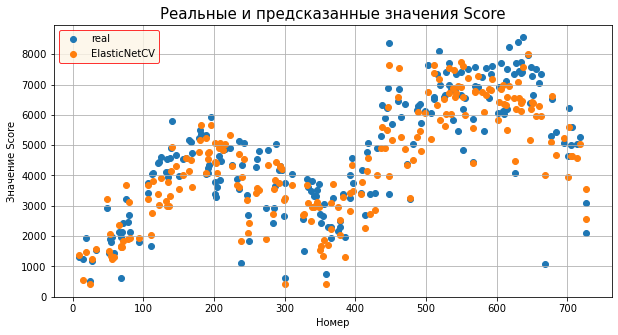

In [31]:
plt.figure(figsize = (10, 5))
plt.scatter(y_holdout.index,
            y_holdout,
            label = 'real')
plt.scatter(y_holdout.index,
            pred,
            label = 'ElasticNetCV')
plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          loc = 'upper left')
plt.xlabel('Номер')
plt.ylabel('Значение Score')
plt.title("Реальные и предсказанные значения Score", fontsize = 15)
plt.grid(True)

# Вывод. В ходе работы на первом этапе были обработаны данные (убраны ненужные, а также произвено масштабирование призанков). На следующих этапах были применены различные модели обучения: Линейная регрессия, Лассо (L1), Гребневая (L2), а также Эластичная (L1 + L2). Наилучшие результаты показали ElasticNetCV и линейная регрессии с коэффицентом детерминации R2 = 0.8964968664266917. Хотя Лассо и Гребневая продемострировали немного хуже резульаты, но их можно также применять (R2 соотвественно равны 0.8962826650369358 и 0.8962826650369358).

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [34]:
%%time
model_knn = KNeighborsRegressor(n_neighbors=10) #Задаем количество соседий на угад
knn_params = {'n_neighbors': list(range(1, 11))}
model_knn_grid = GridSearchCV(model_knn, knn_params,
                              cv = 5,
                              n_jobs = -1, 
                              verbose = False)
model_knn_grid.fit(X_train_standart, y_train)
knn_pred = model_knn_grid.predict(X_holdout_standart)

print("Лучшее качество обучение = {}".format(model_knn_grid.best_score_))
print("Оптимальное количество соседей = {}".format(model_knn_grid.best_params_))
print("Качество обучения на тренировочных данных R^2 = {}".format(model_knn_grid.score(X_train_standart, y_train)))
print("RMSE = {}".format(mean_squared_error(y_holdout, knn_pred, squared = False)))

Лучшее качество обучение = 0.8630000923133672
Оптимальное количество соседей = {'n_neighbors': 5}
Качество обучения на тренировочных данных R^2 = 0.921888406487749
RMSE = 745.4701167109858
Wall time: 238 ms


In [35]:
model_tree = DecisionTreeRegressor(max_depth=15, random_state=17) #Задаем количество соседий на угад
tree_params = {'max_depth': np.arange(1, 15), 
               'max_features': range(1, X_train.shape[1]+1)}

model_tree_grid = GridSearchCV(model_tree, tree_params,
                              cv = 5,
                              n_jobs = -1, 
                              verbose = True)

model_tree_grid.fit(X_train_standart, y_train)
tree_pred = model_tree_grid.predict(X_holdout_standart)

print("Лучшее качество обучение = {}".format(model_tree_grid.best_score_))
print("Оптимальное количество соседей = {}".format(model_tree_grid.best_params_))
print("Качество обучения на тренировочных данных R^2 = {}".format(model_tree_grid.score(X_train_standart, y_train)))
print("RMSE = {}".format(mean_squared_error(y_holdout, tree_pred, squared = False)))

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.8s


Лучшее качество обучение = 0.8301946761030445
Оптимальное количество соседей = {'max_depth': 11, 'max_features': 12}
Качество обучения на тренировочных данных R^2 = 0.9973032870006383
RMSE = 963.8349363210745


[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:    2.2s finished


# Можно сразу отбросить DT, так как качество модели на тренировочных данных и тестовых СИЛЬНО РАЗНЯТЬСЯ. Тоже самое можно и сказать про модель построенную на основе K - ближайших соседий, но необходимо отметить, что RMSE данной модели практически идентично самой лучшей модели (см. выше) ElasticNetCV, поэтому её можно оставить (хотя я бы убрал:) ).